## Data Generation

### created by Yuying Liu, 04/30/2020

Generaging data of toy problem 1. 

$$\Phi(x, t) = u(x)cos(\omega_0 t) + v(x)cos(\omega_1 t + \frac{\pi}{4})$$


In [12]:
import os
import sys
import numpy as np
import scipy as sp
from scipy import integrate
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch

module_path = os.path.abspath(os.path.join('../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
import utils

In [13]:
# paths
data_dir = '../data/toy1_longer'
result_dir = '../result/toy1_longer'

In [14]:
# params
w0 = 0.5
w1 = 4.0
sigma0 = 10.0
sigma1 = 0.25

# define two modes
def phi1(x, y, t):
    return 1./np.cosh((x+1)/sigma0)/np.cosh((y-1)/sigma0)*np.cos(w0*t)

def phi2(x, y, t):
    return 1./(sigma1*np.sqrt(2*np.pi))*np.exp(-((x-1)**2+(y+1)**2)/(2*sigma1**2))*np.cos(w1*t + np.pi/4)

# mesh grids
n_train = 100
n_timesteps = 500
n_per_dim = 128
num_periods_big = 80
num_total_data_points = 5000

x = np.linspace(-5, 5, n_per_dim)
y = np.linspace(-5, 5, n_per_dim)
t = np.linspace(0, num_periods_big*4*np.pi, num_total_data_points)

dt = t[1] - t[0]

xgrid, ygrid, tgrid = np.meshgrid(x, y, t)

Phi = phi1(xgrid, ygrid, tgrid) + phi2(xgrid, ygrid, tgrid)
scaled_Phi = (Phi - Phi.min()) / (Phi.max() - Phi.min())
print("scaled_Phi.shape = ", scaled_Phi.shape)
np.save(os.path.join(data_dir, 'data.npy'), scaled_Phi.T)

scaled_Phi.shape =  (128, 128, 5000)


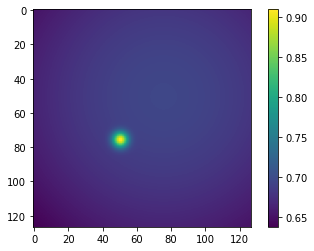

In [5]:
plt.imshow(scaled_Phi.T[0].reshape(n_per_dim, n_per_dim))
plt.colorbar()

Animating, may take a little while...
........................................................................................................................................................................Done! gif saved to  ../result/toy1_longer\original_data.gif


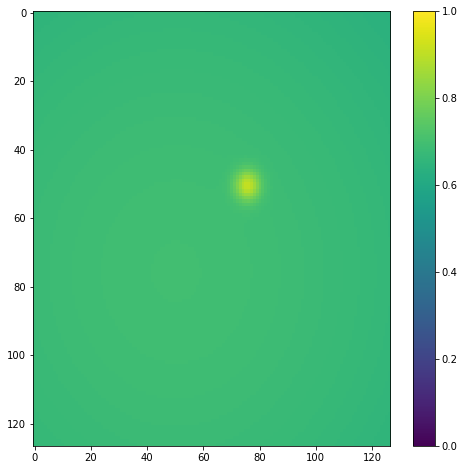

In [6]:
utils.animate(torch.tensor(scaled_Phi.T).unsqueeze(1), os.path.join(result_dir, 'original_data.gif'))

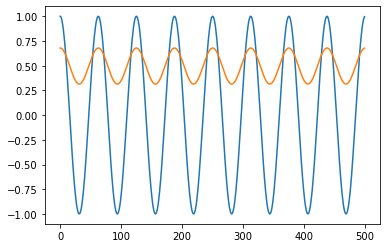

In [11]:
sol = np.cos(w0*t[:500])
plt.plot(sol)

plt.plot(scaled_Phi[34,85,:500])